<h1 align="center">Support Vector Machines</h1>

<br>

This tutorial is based on the book *An Introduction to Statistical Learning*, which is fully accessible online ([link](https://hastie.su.domains/ISLR2/ISLRv2_website.pdf))

In this tutorial, we'll advance from **Maximum Margin Classifiers**, to **Support Vector Classifiers**, and finally to **Support Vector Machines** (SVM).

<br>

<h2 align="center">Theory and intuition</h2>

<h3 align="left">Hyperplanes and Margins</h3>

In geometry, a hyperplane is a subspace whose dimension is one less than that of its ambient space.  

For example,
- if a space is 3-dimensional, then its hyperplanes are the 2-dimensional planes,
- if a space is 2-dimensional, its hyperplanes are the 1-dimensional lines,
- in 1-dimensional space the hyperplanes are single points (mathematically speaking, a point is a flat affine 0-dimensional subspace). 

    $\, \boldsymbol{\rightarrow} \,$ So in N-dimensional space, a hyperplane is a flat affine subspace of dimension $\, N-1. \,$
    

- Suppose your data is 3-dimensional. Then, the hyperplanes are going to be 2-dimensional planes in a 3-dimensional space.

The main idea behind SVM is that whe can use hyperplanes to create a seperation between classes.

$\: \:$ $\, \boldsymbol{\rightarrow} \,$ Then new points will fall on one side of this seperating hyperplane, which we can then use to assign a class.

Now, one might ask that, how do we choose where to put this seperating hyperplane? Essentially we are going to have to decide, which of the many possible points (or planes rather) is going to be the "best" seperator between the classes.

$\: \:$ $\, \boldsymbol{\rightarrow} \,$ One possibility is to use a seperator that **maximizes** the **margins** (*Maximal Margin Classifier*) between the classes.

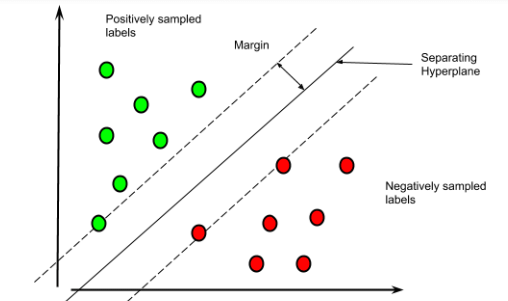
$$\text{Fig 1. Maximum margin classifier.}$$

- In the image above is an example of **Maximum margin classifier** in a plane (2-dimensional space). 
- Since We are in 2-dimensional space, the hyperplane is a line (1-dimensional).
- Each data point is a 2-dimensional vector consisting of information about two different features.

- It will not always be possible to make a seperation such that the different classes don't get mixed up. 
- In some cases, even if it would be possible to perfectly seperate out all of the classes, the resulting **variance** would throw the classifier off by too much, like illustrated in *Figure 2*.
- We can try to tackle cases like this by using a **Support Vector Classifier** (*Figure 3*), which allows soft margins (i.e. allows for misclassification to add more **bias** to our model).
- Choosing a threshold that allows misclassifications is en example of the *Bias-Variance tradeoff* that plagues all of machine learning.
    
    $\, \boldsymbol{\rightarrow} \,$ https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff


- One can use **cross-validation** to determine which **Soft Margin** is the "best". 

    $\, \boldsymbol{\rightarrow} \,$ This way we can determine how many misclassifications and observations to allow inside of the Soft Margin to get the best classification.
    

- When we use **Soft Margin** to determine the the location of a threshold, we are using a **Soft Margin Classifier** (also known as **Support Vector Classifier**) to classify observations.


- The name **Support Vector Classifier** comes from the fact that the observations on the *edge* and *within* the **Soft Margin** are called **Support Vectors**.

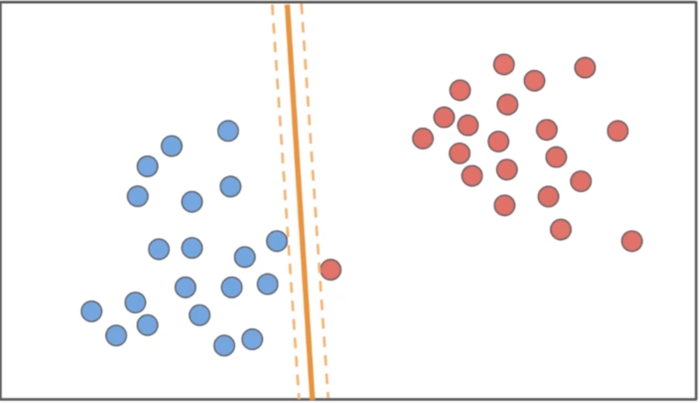
$$\text{Fig 2. Maximal Margin Classifier. This figure illustrates that Maximal Margin Classifier is super sensitive to outliers.}$$

<br>

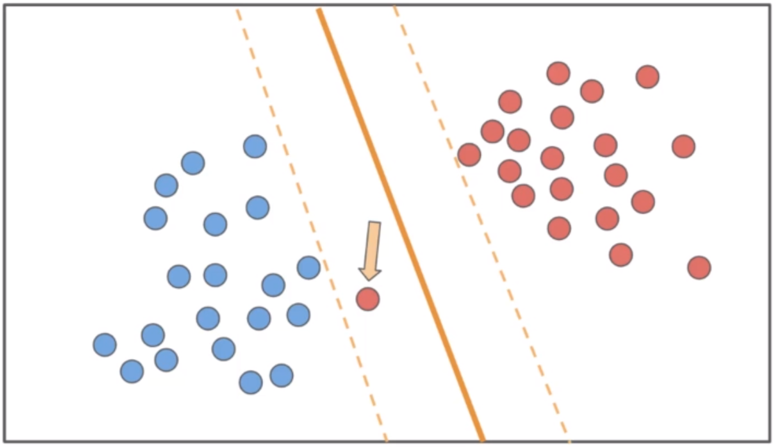
$$\text{Fig 3. Support Vector Classifier allows soft margins.}$$

So far we've only visualized cases where the classes are somewhat easily seperated by the hyperplane in the original feature space. However, next natural question to ask it that, how to deal with cases where it is impossible or nearly impossible to split the classes with a hyperplane or with multiple hyperplanes? Figure 4 displays a situation like this. To solve the problem that is present in figure 4, we're going to need **Support Vector Machines**.

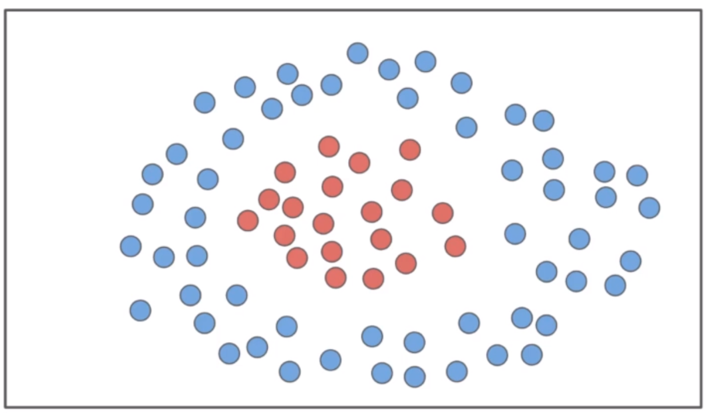
$$\text{Fig 4. In situations like this, Support Vector Machines are needed.}$$

- Support Vector Machines are going to solve the problem where your hyperplanes are not easily able to seperate out your classes, even when allowing for soft margins.
- SVMs use **kernels** to project the data to a higher dimension, in order to use a hyperplane in this higher dimension to seperate the data.

The main ideas behind **Support Vector Machines** are

1. Start with data in a relatively low dimension.
2. Project the data into a higher dimension.
3. Find a Support Vector Classifier that seperates the higher dimensional data into two groups.

<br>

<h3 align="left">The Kernel Trick</h3>

- Kernels allow us to move beyond a Support Vector Classifier and use Support Vector Machines.


- There are a variety of *kernel functions* that we can use to project the features to a higher dimensions.


- Kernel functions systematically find *Support Vector Classifiers* in higher dimensions by calculating the relationships between each pair of observations, and these relationships are used to find a **Support Vector Classifier**.


- Note that *kernel functions* only calculate the relationships between every pair of points as *if* they are in the higher dimensions; they don't actually do the transformation.

    $\, \boldsymbol{\rightarrow} \,$  This trick, calculating the high-dimension relationships without actually transforming the data to the higher dimension, is called **The Kernel Trick**.
    
    
- In sklearn, the kernel functions that you can choose from are: 
    - linear 
    - polynomial 
    - radial basis function (RBF) 
    - sigmoid 
    - precomputed


- **The Kernel Trick...** 
    - allows one to deal with very large feature spaces.
    - makes use of the **inner product** of vectors.
    - reduces the amount of computation required for *Support Vector Machines* by avoiding the math that transforms the data from lower dimensions to higher dimensions.

<br>

<h1 align="center">Support Vector Machines in scikit-learn</h1

<h2 align="left">Classification</h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("C:/Users/testi/Desktop/ML/DATA/mouse_viral_study.csv")

In [3]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In this study, mouses were infected with a virus and then given various doses of two different medicines. The researchers then checked two weeks later whether or not the mouses were still infected.
- Med_1_mL: amount of medicine 1 that a mouse received (in millilitres)
- Med_2_mL: amount of medicine 2 that a mouse received (in millilitres)
- Virus Present: whether or not the virus is present (0 = virus not present, 1 = virus present)

You always want to start by exploring your data set.

In [6]:
df.shape

(400, 3)

In [7]:
df.dtypes

Med_1_mL         float64
Med_2_mL         float64
Virus Present      int64
dtype: object

In [5]:
df["Virus Present"].value_counts()

0    200
1    200
Name: Virus Present, dtype: int64

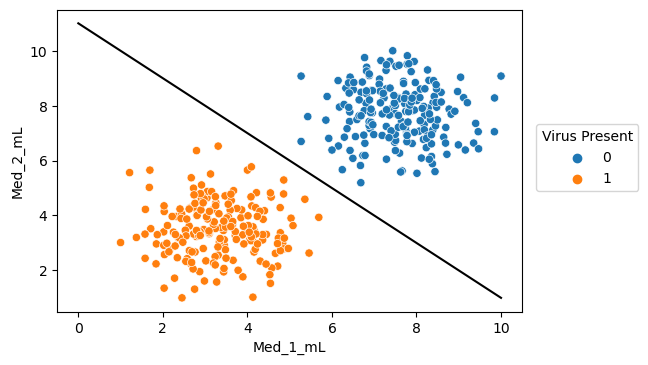

In [34]:
plt.figure(figsize=(6, 4), dpi=100)
sns.scatterplot(x="Med_1_mL", y="Med_2_mL", hue="Virus Present", data=df)
plt.legend(title="Virus Present", loc=(1.03, 0.4))

# Hyperplane (Since we are in 2D, hyperplane is just going to be a line)
x = np.linspace(0, 10, 100)
m = -1
b = 11
y = m*x + b

plt.plot(x, y, "black");

In [20]:
# Import Support Vector Classifier
from sklearn.svm import SVC

We're not going to do the whole data preperation process here, since for now, we just want to visually explore the algorithm.

In [35]:
X = df.drop("Virus Present", axis=1)
y = df["Virus Present"]

<br>

<h3 align="left">Linear Kernel</h3>

In [49]:
# linear kernel with an arbitrary C value
model1 = SVC(kernel="linear", C=1000)

- **C** is a regularization parameter. 
    - The strength of the regularization is inversely proportional to C. 
    - Must be strictly positive. 
    - The penalty is a squared l2 penalty.
    
    
- The C parameter represents the inverse of the regularization strength, where a smaller value of C leads to a larger margin and allows more misclassifications in the training set. On the other hand, a larger value of C results in a smaller margin and imposes a stricter penalty for misclassifications, aiming for better classification accuracy on the training set.


- In essence, the C parameter balances the trade-off between maximizing the margin and minimizing the misclassifications. A smaller C value can help prevent overfitting by allowing more flexibility in the decision boundary, while a larger C value can lead to overfitting by forcing the model to closely fit the training data, possibly at the cost of generalization to unseen data

In [50]:
model1.fit(X.values, y.values)

SVC(C=1000, kernel='linear')

In [39]:
# CODE SOURCE IS DIRECTLY FROM DOCUMENTATION
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html

def plot_svm_boundary(model,X,y):
    
    X = X.values
    y = y.values
    
    # Scatter Plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30,cmap='seismic')

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

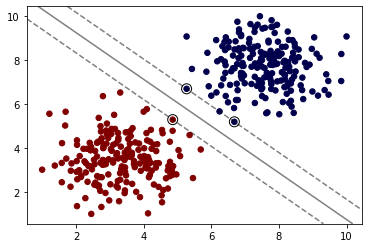

In [51]:
plot_svm_boundary(model1, X, y)

In [56]:
# Different C value
model2 = SVC(kernel="linear", C=0.05)
model2.fit(X.values, y.values)

SVC(C=0.05, kernel='linear')

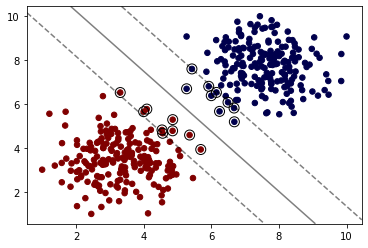

In [57]:
plot_svm_boundary(model2, X, y)

- As the C parameter gets closer to zero, you are essentially allowing more points to go *within* the margin.
- To illustrate this even further, let's set C even closer to zero. 

    $\, \boldsymbol{\rightarrow} \,$ What should happen is that more points should lie inside the margin (i.e. the margin becomes "softer")

In [64]:
# C = 0.005
model3 = SVC(kernel="linear", C=0.005)
model3.fit(X.values, y.values)

SVC(C=0.005, kernel='linear')

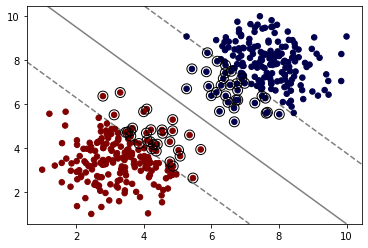

In [65]:
plot_svm_boundary(model3, X, y)

- The appropriate C value depends on the dataset that you are working with. 
- It is very difficult to have some sort of intuition about what an appropriate C value is.

    $\, \boldsymbol{\rightarrow} \,$ To figure out the optimal C value, one can use **Cross Validation** and **Grid Search**.

<br>

<h3 align="left">Radial Basis Function Kernel</h3>

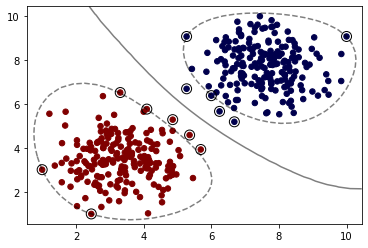

In [67]:
model_rbf1 = SVC(kernel="rbf", C=1)
model_rbf1.fit(X.values, y.values)

# Note that since RBF is going to project our dataset into a higher dimensional space, 
# when we plot it, it's not going to look linear.
plot_svm_boundary(model_rbf1, X, y)

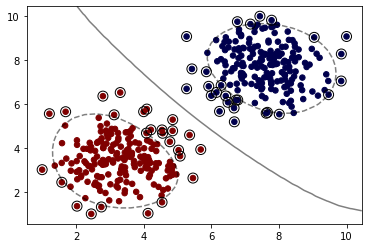

In [70]:
# Again, when we move C closer to zero, we allow "softer margins"
model_rbf2 = SVC(kernel="rbf", C=0.1)
model_rbf2.fit(X.values, y.values)
plot_svm_boundary(model_rbf2, X, y)

Another parameter that we have to consider when using the RBF, is the **gamma** parameter.

In [73]:
# Look for the gamma parameter from the docstring 
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

- In general, the gamma parameter defines how much *influence* a single training example (data point) has.


- Larger gamma value indicates larger influence *per training example*.


- More specifically, gamma controls the *shape* of the *decision boundary (hyperplane)* in the SVC model. It affects the model's ability to fit complex and non-linear patterns in the training data.


- When gamma is set to a low value, the influence of training examples is considered to be far-reaching. In this case, the decision boundary will be smoother, and the model will be more tolerant of variations in the data. 

    $\, \boldsymbol{\rightarrow} \,$ This can potentially lead to underfitting if the model is too simple for the underlying complexity of the data.
    
    
- Conversely, when gamma is set to a high value, the influence of training examples is localized to the immediate vicinity. This leads to a more complex decision boundary, and the model becomes sensitive to even small variations in the data. 

    $\, \boldsymbol{\rightarrow} \,$ Setting a high gamma value can result in overfitting if the model becomes too focused on individual training examples and fails to generalize well to unseen data.
    
    
- Selecting an appropriate gamma value depends on the specific dataset and problem at hand. It is typically chosen through cross-validation or other hyperparameter tuning techniques to find the optimal balance between underfitting and overfitting.

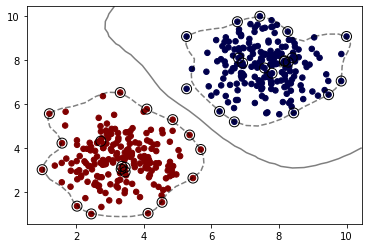

In [76]:
model_rbf3 = SVC(kernel="rbf", C=1, gamma=0.5)
model_rbf3.fit(X.values, y.values)
plot_svm_boundary(model_rbf3, X, y)

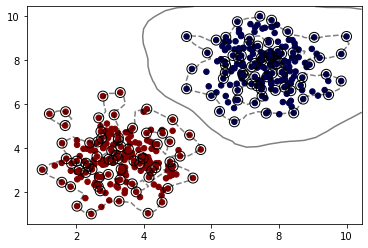

In [75]:
model_rbf4 = SVC(kernel="rbf", C=1, gamma=2)
model_rbf4.fit(X.values, y.values)
plot_svm_boundary(model_rbf4, X, y)

- Notice that when gamma gets larger, the margin is starting to pick a ton of information from the data points, essentially overfitting to the data.

<br>

<h3 align="left">Cross Validation and Grid Search (Basic Idea)</h3>

In SVM, you're going to nearly always perform a cross validation and grid search to tune the hyperparameters. \
If you're not familiar with these concepts, you can check my tutorial on them from [HERE](https://github.com/HerraKaava/Python_Projects/blob/main/Machine-Learning-Tutorials/Cross-Validation.ipynb) 

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
base_svm = SVC()
param_grid = {"C": [0.01, 0.1, 1], "kernel": ["linear", "rbf"]}

In [79]:
grid = GridSearchCV(base_svm, param_grid)

In [80]:
# Note that we haven't performed a train test split, since we only wanted to visualize SVM.
grid.fit(X, y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [81]:
# Best parameters
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

- Since our data set is really simple, it is intuitive that the best performance is achieved with the **linear kernel**.

<br>

<br>

<h2 align="left">Regression</h2>

**Support Vector Regression (SVR)** is a type of machine learning algorithm used for regression analysis. The goal of SVR is to find a function that approximates the relationship between the input variables and a continuous target variable, while minimizing the prediction error.

In [83]:
data = pd.read_csv("C:/Users/testi/Desktop/ML/DATA/cement_slump.csv")

In [84]:
data.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [85]:
data.shape

(103, 10)

In [86]:
data.dtypes

Cement                                float64
Slag                                  float64
Fly ash                               float64
Water                                 float64
SP                                    float64
Coarse Aggr.                          float64
Fine Aggr.                            float64
SLUMP(cm)                             float64
FLOW(cm)                              float64
Compressive Strength (28-day)(Mpa)    float64
dtype: object

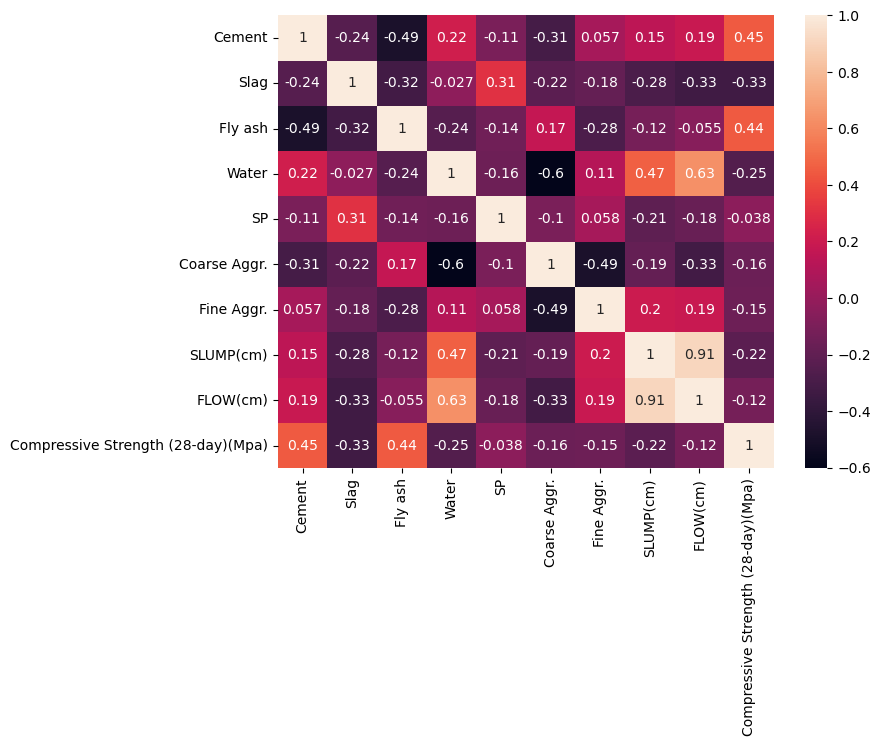

In [91]:
# Check out the correlations
plt.figure(figsize=(8, 6), dpi=100)
sns.heatmap(data.corr(), annot=True);

<h3 align="left">Data Preperation</h3>

Note that you could do this in pipeline, but to emphasize the data preperation steps, i'm not going to do that here.

In [95]:
features = data.drop("Compressive Strength (28-day)(Mpa)", axis=1)
label =  data["Compressive Strength (28-day)(Mpa)"]

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    label, 
                                                    test_size=0.3, 
                                                    random_state=101)

In [112]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (72, 9)
Shape of y_train: (72,)
Shape of X_test: (31, 9)
Shape of y_test: (31,)


In [98]:
from sklearn.preprocessing import StandardScaler

In [99]:
scaler = StandardScaler()

In [100]:
# Fit the scaler on X_train
scaler.fit(X_train)

StandardScaler()

In [102]:
# Scale the training data.
# Note that we don't scale the label.
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [103]:
# If you already know that you're going to use a linear kernel,
# then you should use LinearSVR, since it's computationally faster than SVR for linear kernel.
# The downside is that you can't explore any other kernel functions with LinearSVR.
from sklearn.svm import SVR, LinearSVR

In [104]:
help(SVR)

Help on class SVR in module sklearn.svm._classes:

class SVR(sklearn.base.RegressorMixin, sklearn.svm._base.BaseLibSVM)
 |  SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
 |  
 |  Epsilon-Support Vector Regression.
 |  
 |  The free parameters in the model are C and epsilon.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to datasets with more than a couple of 10000 samples. For large
 |  datasets consider using :class:`~sklearn.svm.LinearSVR` or
 |  :class:`~sklearn.linear_model.SGDRegressor` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  Read more in the :ref:`User Guide <svm_regression>`.
 |  
 |  Parameters
 |  ----------
 |  kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable,          default='rbf'


In [107]:
# Let's create a base model for SVR with the default parameters
base_svr = SVR()

In [108]:
base_svr.fit(scaled_X_train, y_train)

SVR()

In [109]:
base_preds = base_svr.predict(scaled_X_test)

In [110]:
base_preds

array([33.54538508, 36.88488329, 35.31862535, 34.4982983 , 38.78862684,
       37.28692733, 34.70488018, 37.45383093, 38.5643203 , 40.60987705,
       36.12704821, 33.47125341, 33.80688776, 35.57395401, 39.06389895,
       39.20405978, 38.73343751, 36.38267762, 32.54415537, 34.41850278,
       37.08595015, 35.95245982, 35.172924  , 32.85268464, 38.10884757,
       36.35378576, 34.496466  , 33.01047764, 36.06717968, 35.99982788,
       34.58986779])

In [113]:
# Evaluate performance
from sklearn.metrics import mean_squared_error

In [156]:
# Root mean squared error (RMSE)
np.sqrt(mean_squared_error(y_test, base_preds))

6.695914838327133

In [118]:
y_test.mean()

36.26870967741935

- The predictions, on average, are off by 6.7 Mpa, and the mean value of y_test (which contains a sample of the true unseen label values) is 36.3 Mpa.

Now, since this was just the base model, we're going to want to improve on this by performing **Grid Search**.

In [147]:
parameter_grid = {"C": [0.001, 0.01, 0.1, 0.5, 1],
                  "kernel": ["linear", "rbf", "poly"],
                  "gamma": ["scale", "auto"],
                  "degree": [2, 3, 4],
                  "epsilon": [0, 0.01, 0.1, 0.5, 1, 2]}

- Note that only the *polynomial kernel* is going to use the **degree** hyperparameter.
- **epsilon** is the error you're willing to allow per training data instance (you typically want to start with small epsilon values and gradually work up to some higher values).

In [148]:
from sklearn.model_selection import GridSearchCV

In [149]:
svr = SVR()

In [150]:
grid_search = GridSearchCV(svr, parameter_grid)

In [151]:
grid_search.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [152]:
# Check the best parameters
grid_search.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

Lastly, let's check if these parameters found using grid search perform better than the parameters of the base model.

In [161]:
grid_preds = grid_search.predict(scaled_X_test)

In [162]:
# RMSE
np.sqrt(mean_squared_error(y_test, grid_preds))

3.1782103051198347

In [163]:
print(f"Base model RMSE: {np.sqrt(mean_squared_error(y_test, base_preds))}")
print(f"Grid Search model RMSE: {np.sqrt(mean_squared_error(y_test, grid_preds))}")

Base model RMSE: 6.695914838327133
Grid Search model RMSE: 3.1782103051198347


- We managed to significantly improve the performance of the model by tuning the hyperparameters using Grid Search.

Final words on **Cross Validation** and **Grid Search**.
- **Cross-validation** is a resampling technique used to assess the performance of a model on an independent dataset. It helps to estimate how well a model will generalize to new, unseen data. The basic idea behind cross-validation is to split the available data into multiple subsets or folds. The model is trained on a portion of the data (training set) and evaluated on the remaining portion (validation set). This process is repeated several times, with different splits of the data, and the performance metrics are averaged across the iterations to provide a more robust estimate of the model's performance.


- **Grid search**, on the other hand, is a method used for hyperparameter tuning. Hyperparameters are parameters that are set before the learning process begins, such as the learning rate, regularization strength, or the number of hidden units in a neural network. Grid search involves specifying a set of possible values for each hyperparameter of interest, and then systematically searching through all possible combinations of these values. For each combination, the model is trained and evaluated using cross-validation. The goal of grid search is to find the optimal combination of hyperparameters that results in the best performance of the model.


- In summary, **cross-validation is used to evaluate the performance of a model**, while **grid search is used to find the best combination of hyperparameters for a model**. Grid search often utilizes cross-validation to assess the performance of different hyperparameter configurations.

You often hear these two concepts being talked about on the same context, but they don't mean the same thing.